<a href="https://colab.research.google.com/github/AbhinavKumar0000/Data_collection_pipeline/blob/main/Annotation_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Annotation of Job Postings

This notebook performs exploratory data analysis (EDA) on the cleaned job posting data, visualizes the most frequent unigrams and bigrams, extracts technical skills, and annotates the dataset with experience levels, job types, and skill tags. The results are saved to CSV and JSON files.

## Prerequisites
- Ensure `cleaned_data.csv` exists (generated from the previous data cleaning step)
- Required libraries: `pandas`, `sklearn`, `matplotlib`, `seaborn`, `numpy`
- The script assumes the input CSV has a `cleaned_description` column

## Steps
1. Load the cleaned data
2. Perform unigram and bigram frequency analysis using `CountVectorizer`
3. Visualize the top 20 unigrams and bigrams
4. Cross-reference EDA results with a master list of technical skills
5. Annotate the dataset with experience levels, job types, and skill tags
6. Save the annotated data to CSV and JSON formats

In [2]:
#Importing necessary Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Reading file
try:
    df_eda = pd.read_csv('cleaned_data.csv').dropna(subset=['cleaned_description'])
    print(f"Loaded cleaned_data.csv for analysis, containing {len(df_eda)} records")
except FileNotFoundError:
    print("Error: cleaned_data.csv not found")

Loaded cleaned_data.csv for analysis, containing 50 records


###Unigram (Single Word) Frequency Analysis


In [4]:
vec_unigram = CountVectorizer(stop_words='english', ngram_range=(1, 1))
unigram_counts = vec_unigram.fit_transform(df_eda['cleaned_description'])
sum_words = unigram_counts.sum(axis=0)
words_freq = sorted([(word, sum_words[0, idx]) for word, idx in vec_unigram.vocabulary_.items()], key=lambda x: x[1], reverse=True)
top_20_words = pd.DataFrame(words_freq[:20], columns=['Word', 'Frequency'])

### Bigram (Two Word Phrase) Frequency Analysis

In [5]:
vec_bigram = CountVectorizer(stop_words='english', ngram_range=(2, 2))
bigram_counts = vec_bigram.fit_transform(df_eda['cleaned_description'])
sum_phrases = bigram_counts.sum(axis=0)
phrases_freq = sorted([(phrase, sum_phrases[0, idx]) for phrase, idx in vec_bigram.vocabulary_.items()], key=lambda x: x[1], reverse=True)
top_20_phrases = pd.DataFrame(phrases_freq[:20], columns=['Phrase', 'Frequency'])

## Visualization of EDA Results


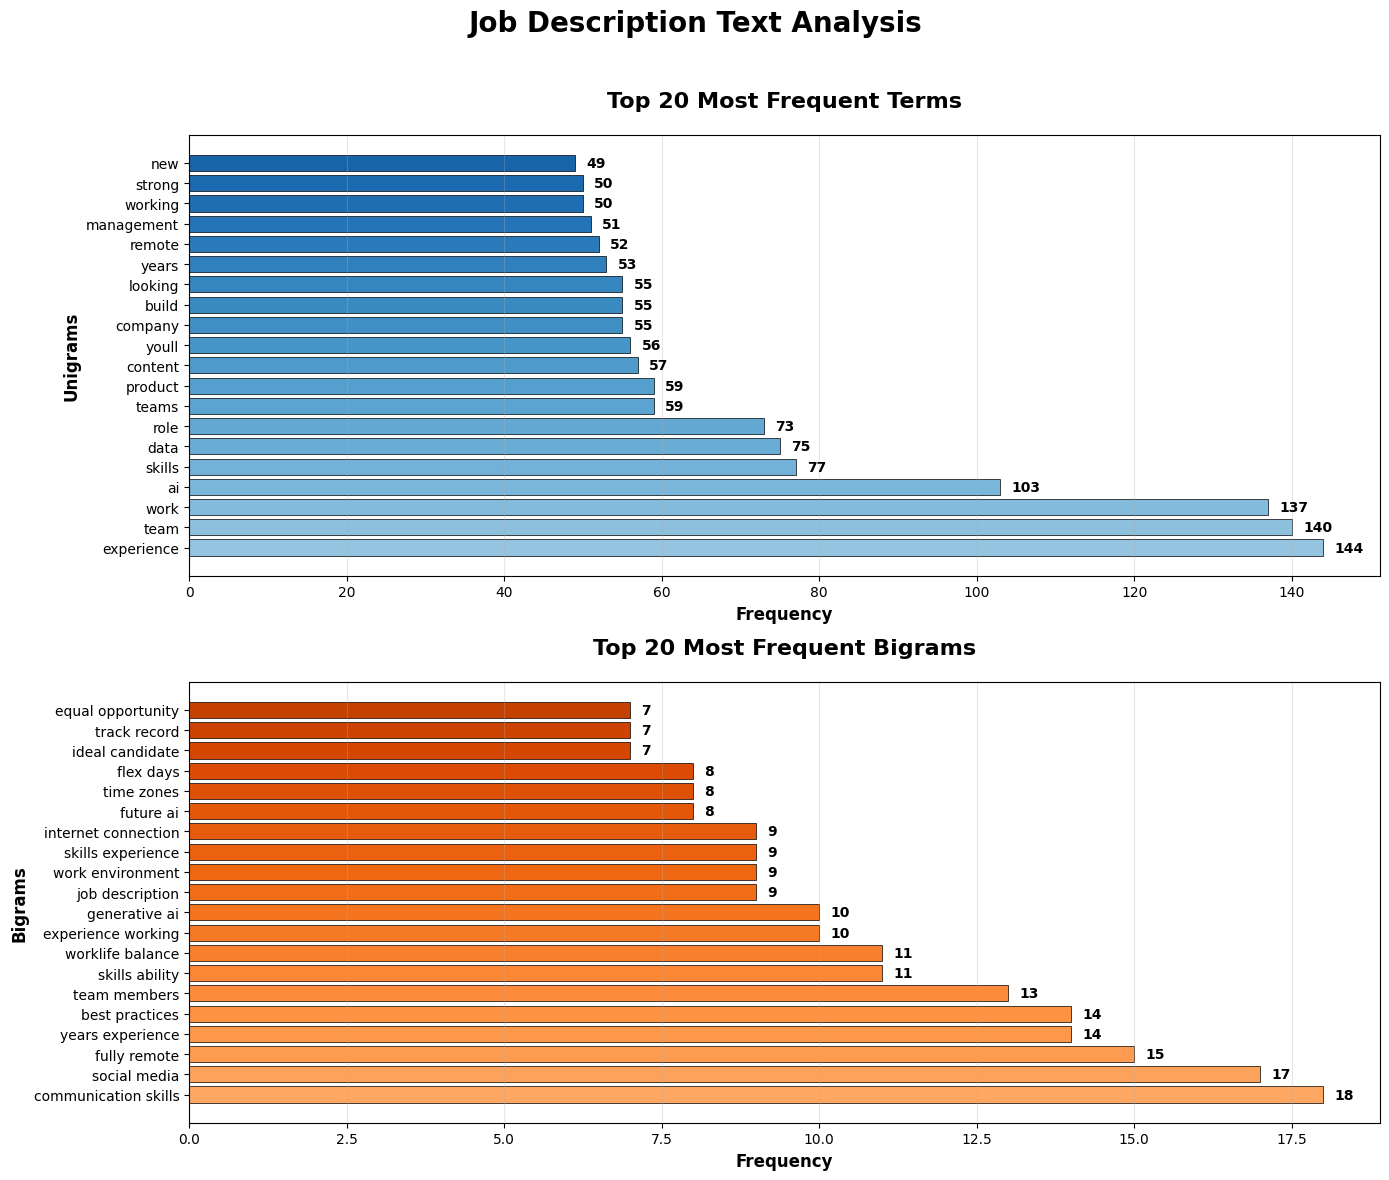

In [6]:
plt.style.use('default')
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Job Description Text Analysis', fontsize=20, fontweight='bold', y=0.98)

#Plot 1: Top 20 words with horizontal bars
bars1 = axes[0].barh(top_20_words['Word'], top_20_words['Frequency'],
                    color=plt.cm.Blues(np.linspace(0.4, 0.8, len(top_20_words))),
                    edgecolor='black', linewidth=0.5)
axes[0].set_title('Top 20 Most Frequent Terms', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Unigrams', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

for i, (value, word) in enumerate(zip(top_20_words['Frequency'], top_20_words['Word'])):
    axes[0].text(value + max(top_20_words['Frequency'])*0.01, i,
                f'{value:,}', va='center', fontsize=10, fontweight='bold')

#Plot 2: Top 20 phrases with different color scheme
bars2 = axes[1].barh(top_20_phrases['Phrase'], top_20_phrases['Frequency'],
                    color=plt.cm.Oranges(np.linspace(0.4, 0.8, len(top_20_phrases))),
                    edgecolor='black', linewidth=0.5)
axes[1].set_title('Top 20 Most Frequent Bigrams', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Bigrams', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

for i, (value, phrase) in enumerate(zip(top_20_phrases['Frequency'], top_20_phrases['Phrase'])):
    axes[1].text(value + max(top_20_phrases['Frequency'])*0.01, i,
                f'{value:,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 Generating a skill list by cross referencing EDA results with a Master list of known Technical Skills


In [7]:
MASTER_SKILL_LIST = [
    #Programming Languages
    'python', 'javascript', 'typescript', 'java', 'go', 'golang', 'ruby', 'php', 'c++', 'c#', 'rust', 'kotlin', 'swift',

    #Frontend Frameworks & Libraries
    'react', 'angular', 'vue', 'svelte', 'next js', 'react native',

    #Backend Frameworks & Libraries
    'node js', 'django', 'flask', 'fastapi', 'spring', 'ruby on rails',

    #Cloud Platforms & Services
    'aws', 'gcp', 'azure', 'amazon web services', 'google cloud', 'heroku', 'digitalocean',

    #Databases & Caching
    'sql', 'nosql', 'postgresql', 'mysql', 'mongodb', 'redis', 'cassandra', 'dynamodb', 'elasticsearch',

    #DevOps, Infrastructure & Tooling
    'docker', 'kubernetes', 'terraform', 'ansible', 'jenkins', 'ci cd', 'git', 'github', 'gitlab',

    #Data Science & ML
    'pandas', 'numpy', 'tensorflow', 'pytorch', 'scikit learn', 'apache spark', 'hadoop'
]

def generate_skills_from_eda(words_freq, phrases_freq, master_list):
    frequent_terms = {item[0] for item in words_freq + phrases_freq}
    identified_skills = [skill for skill in master_list if skill in frequent_terms]

    return identified_skills

if 'words_freq' in locals() and 'phrases_freq' in locals():

    SKILL_KEYWORDS = generate_skills_from_eda(words_freq, phrases_freq, MASTER_SKILL_LIST)
    print(f"Found {len(SKILL_KEYWORDS)} relevant skills in the dataset based on the EDA")
    print(SKILL_KEYWORDS)
else:
    print("Error: EDA results ('words_freq', 'phrases_freq') not found. Please run the EDA step first")
    #As a fallback, use the full master list
    SKILL_KEYWORDS = MASTER_SKILL_LIST

Found 28 relevant skills in the dataset based on the EDA
['python', 'javascript', 'typescript', 'java', 'ruby', 'php', 'swift', 'react', 'react native', 'spring', 'aws', 'gcp', 'azure', 'sql', 'postgresql', 'mysql', 'docker', 'kubernetes', 'terraform', 'ansible', 'jenkins', 'git', 'github', 'gitlab', 'pandas', 'numpy', 'tensorflow', 'apache spark']


Assigning label for experience_level, job_type and technical_skills

In [8]:
def get_experience_level(desc):

    if any(k in desc for k in ['principal', 'lead', 'staff', '10+', '8+ years']): return 'Lead/Principal'
    if any(k in desc for k in ['senior', 'sr', '5+ years', '6+ years']): return 'Senior'
    if any(k in desc for k in ['mid level', '2+ years', '3+ years']): return 'Mid-Level'
    if any(k in desc for k in ['junior', 'jr', 'entry level', 'graduate']): return 'Entry-Level'
    return 'Not Specified'

def get_job_type(desc):

    if any(k in desc for k in ['full stack', 'fullstack']): return 'Full-Stack'
    if any(k in desc for k in ['backend', 'back end', 'api']): return 'Backend'
    if any(k in desc for k in ['frontend', 'front end', 'ui', 'ux']): return 'Frontend'
    if any(k in desc for k in ['mobile', 'ios', 'android']): return 'Mobile'
    if any(k in desc for k in ['devops', 'sre', 'infrastructure']): return 'DevOps'
    if 'data engineer' in desc: return 'Data'
    return 'Not Specified'

def extract_skill_tags(desc):

    found = [skill for skill in SKILL_KEYWORDS if skill in desc]
    return ', '.join(found) if found else 'No Tags Found'

In [9]:
try:
    df_annotate = pd.read_csv('cleaned_data.csv')
    print(f"Applying annotation rules to {len(df_annotate)} cleaned records")

    df_annotate['experience_level'] = df_annotate['cleaned_description'].apply(get_experience_level)
    df_annotate['job_type'] = df_annotate['cleaned_description'].apply(get_job_type)
    df_annotate['skill_tags'] = df_annotate['cleaned_description'].apply(extract_skill_tags)

    final_columns = ['job_title', 'company_name', 'experience_level', 'job_type', 'skill_tags', 'cleaned_description']
    annotated_df = df_annotate[final_columns].head(20)
    print("Created a sample of 20 annotated records")

    #Saving to CSV format
    annotated_df.to_csv('annotated_data.csv', index=False)
    print("Successfully saved annotated sample to annotated_data.csv")

    #Saving to JSON format
    annotated_df.to_json('annotated_data.json', orient='records', indent=4)
    print("Successfully saved annotated sample to annotated_data.json")

except FileNotFoundError:
    print("Error: cleaned_data.csv not found.")

Applying annotation rules to 50 cleaned records
Created a sample of 20 annotated records
Successfully saved annotated sample to annotated_data.csv
Successfully saved annotated sample to annotated_data.json


In [10]:
if 'annotated_df' in locals():
    print("Annotaed data:")
    display(annotated_df)

Annotaed data:


,job_title,company_name,experience_level,job_type,skill_tags,cleaned_description
0,QA Test Engineer,PrimeWorks,Lead/Principal,Backend,"react, azure, git, github, gitlab",you will be working for a usbased technology c...
1,"Senior Product Manager, Platform",ServiceUp,Lead/Principal,Backend,No Tags Found,about the role serviceup is seeking a senior p...
2,Business Development Associate,Forbes Advisor,Not Specified,Frontend,aws,company description at forbes advisor our miss...
3,Graphic Designer,DMS International,Lead/Principal,Frontend,"spring, git",data management services inc dba dms internati...
4,Client Success Manager,"Momentive Software, Inc.",Lead/Principal,Frontend,No Tags Found,this description is a summary of our understan...
5,Ed-Tech Implementation Specialist,ClickView,Lead/Principal,Frontend,git,join a passionate us team at a worldwide leadi...
6,Frontend Developer,Weekday AI,Not Specified,Backend,"typescript, react",this role is for one of weekdays clients salar...
7,AI Image Generation Specialist,INDG,Not Specified,Backend,No Tags Found,we are seeking a highly creative and technical...
8,Applied AI Operations Lead,Canvas Medical,Lead/Principal,Backend,No Tags Found,company overview canvas medical is acceleratin...
9,Content Writer & PR Strategist,Uvation,Lead/Principal,Frontend,No Tags Found,role overview as a content writer pr strategis...


In [11]:
annotated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_title            20 non-null     object
 1   company_name         20 non-null     object
 2   experience_level     20 non-null     object
 3   job_type             20 non-null     object
 4   skill_tags           20 non-null     object
 5   cleaned_description  20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB
